In [1]:
# Peter Karras 2020
''' Contains the Custom Dataset creation and the CNN
    NOTE: MUST HAVE FILE FROM MAKEMASTER PROGRAM PRIOR TO RUNNING'''

' Contains the Custom Dataset creation and the CNN\n    NOTE: MUST HAVE FILE FROM MAKEMASTER PROGRAM PRIOR TO RUNNING'

In [ ]:
#Time: 401.0922603607178s for 10,000 files
#max is: 43.8977567043499
#max is: 22.0574247607658
# Time: 153.2100191116333 for 4,000 files
# max is: 40.046902918943
# max is: 22.0574247607658
# Time: 98.4042558670044 for 2,500 files
# max is: 40.508388402478
# min is: 24.8413349715329
# Time: 33.11633038520813 for 933 files
# max is: 40.3920694022969
# min is: 24.8413349715329
# Time: for 9000 files
# max is: 43.85429664867971
# min is: 21.584069668121902

# FULL 55000
#Time taken (s): 45913.3
#Max value is: 43.8977567043499
#Min value is: 21.584069668121902

# March
#Time: 187.95090889930725
#max is: 40.342822540551296
#min is: 22.0574247607658
# April
# Time: 286.47614312171936
# max is: 43.8977567043499
# min is: 23.0867814341884
# May
# Time: 355.6945369243622
# max is: 41.651975331159896
# min is: 22.549667363426103
# June
# Time: 258.5124309062958
# max is: 42.1865665374543
# min is: 24.2563848704595
# July
# Time: 117.10082149505615
# max is: 40.3920694022969
# min is: 23.3752163703192
# August
# Time: 167.5036985874176
# max is: 40.1815051816256
# min is: 22.1157735577469
# Sep
# Time: 252.0023398399353
# max is: 43.200494433666
# min is: 21.9034323541466

"""
epochinfotime
"""
# 3batchsize Epochs for 55,000 take 1446 s per epoch
# Epochs for 10,000 files take 280 s per epoch
# Epochs for 4,000 files take 101 s per epoch
# Epochs for 2,500 files take 65 s per epoch
# Epochs for 933 files take 24 s per epoch

""" 
EPOCH TIME CALC
"""
# fileSize = 5000.0
# minutesToTrain = 60 * 3

# secondsPerEpoch = (0.0287*(fileSize) - 6.4268)
# secondsToTrain = minutesToTrain * 60.0
# epochsToUse = secondsToTrain/secondsPerEpoch
# print("To train for", minutesToTrain, "minutes use", epochsToUse, "epochs") 

In [1]:
""" IMPORT NEEDED MODULES """

import pandas as pd
import os
import csv
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import time
from datetime import datetime

import torch
import torch.utils.data
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler

import torch.optim as optim
from torch.autograd import Variable
from torchvision import transforms
from torch.utils.data.dataset import Dataset  # For custom datasets

In [2]:
# Issues with directories, use this to reset cwd and then move into desired directory 
#os.chdir("/content")
startingDir = os.getcwd()
if startingDir != r"C:/Users/Peter/Desktop/Thermo_R_Code/FinalThermo/new2/":
    startingDir = r"C:/Users/Peter/Desktop/Thermo_R_Code/FinalThermo/new2/"
print(startingDir)
csvfilesMLLocation = r"C:/Users/Peter/Desktop/Thermo_R_Code/FinalThermo/new2/csvdataFULL/BCIML_Dataset"

C:/Users/Peter/Desktop/Thermo_R_Code/FinalThermo/new2/


In [3]:
""" CREATE CUSTOM DATASET """
# Pulls from pool of 900 thermal images
class BCIDataset2(Dataset):
    def __init__(self, csv_master_path, transform=None):
        """
        Args:
            csv_master_path (string): path to csv file with thermal image (csv's) file paths
            as first column and GPP values as the second column, rows are one set of
            correlating data points
            transform (callable, optional): Optional transform to be applied on a sample
        """
        # Transforms
        self.to_tensor = transforms.ToTensor()
        # Read the csv file 
        #self.data_info = pd.read_csv(csv_master_path, header=None)
        self.data_info = pd.read_csv(csv_master_path)
        # First column contains thermal image (csv's) file paths
        self.thermal_path_arr = np.asarray(self.data_info.iloc[:,0])
        # Second column is the GPP values for the images from first column
        self.GPP_arr = np.asarray(self.data_info.iloc[:,1])        
        self.transform = transforms.ToTensor()
        max_list = np.full(1,-10)
        min_list = np.full(1, 99999)
        os.chdir(csvfilesMLLocation)
        start = time.time()
#         for filename in self.thermal_path_arr:
#             file_temps = pd.read_csv(filename)
#             file_temps_vals = file_temps.values
#             torch_temps = torch.from_numpy(file_temps_vals)
#             max_list = np.append(max_list, [torch.max(torch_temps)])
#             min_list = np.append(min_list, [torch.min(torch_temps)])
#         self.ABS_MAX = (torch.max(torch.from_numpy(max_list))).item()
#         self.ABS_MIN = (torch.min(torch.from_numpy(min_list))).item()
        self.ABS_MAX = 40.3920694022969
        self.ABS_MIN = 23.3752163703192
        print(f'Time: {time.time()-start}')
        print("max is:", self.ABS_MAX)
        print("min is:", self.ABS_MIN)
            
        
    #NOTE: might need to flip image
    def __getitem__(self, index):
        # Get thermal image (csv) path
        single_thermal_path = self.thermal_path_arr[index]
        # Convert csv to pandas dataframe
        pd_thermal_img = pd.read_csv(single_thermal_path)
        # Convert pandas dataframe to numpy array
        ###np_thermal_img = np.asarray(pd_thermal_img.iloc[:,1:])
        np_thermal_img = np.asarray(pd_thermal_img)
        # Normalization of values from orignal csv file, translates thermal values to 0-1 range
        # https://stats.stackexchange.com/questions/70801/how-to-normalize-data-to-0-1-range
        np_normalized_temp_no_channel = ((np_thermal_img-self.ABS_MIN)/(self.ABS_MAX - self.ABS_MIN))
        # Flip image by 90 degrees, is commented out currently as might mess with network architecture
        #np_thermal_img = np.rot90(np_thermal_img)
        # Add num channels dimension and format correctly
        np_normalized_temp = np.expand_dims(np_normalized_temp_no_channel, axis=0)
        # Transform numpy array to tensor
        tensor_normal_thermal_vals = torch.from_numpy(np_normalized_temp)
        # Get GPP value for image
        single_image_GPP = self.GPP_arr[index]
        return(tensor_normal_thermal_vals, single_image_GPP)
    
    def __len__(self):
        return len(self.data_info)

In [4]:
"""Working network"""
class BCIModel(nn.Module):
    def __init__(self):
        super(BCIModel, self).__init__()
        # Convulutional Layer 1 (sees 320 x 240 x 1 image tensor)
        self.conv1 = nn.Conv2d(1, 16, 3, padding = 1)
        # Convulutional Layer 2 (sees 160 x 120 x 16 image tensor)
        self.conv2 = nn.Conv2d(16, 32, 3, padding = 1)
        # Convulutional Layer 3 (sees 80 x 60 x 32 tensor, reduced height and width from max pooling layer and stride=2)
        self.conv3 = nn.Conv2d(32, 64, 3, padding = 1)
        # Convulutional Layer 4 (sees 40 x 30 x 64 tensor, reduced height and width from max pooling layer and stride=2)
        self.conv4 = nn.Conv2d(64, 128, 3, padding = 1)
        # Max pooling layer
        self.pool = nn.MaxPool2d(2,2)
        # Linear and Batchnorm Layers
        self.fc1 = nn.Linear(128 * 20 * 15, 100)
        self.BatchN = nn.BatchNorm1d(100)
        self.fc2 = nn.Linear(100, 1)
        
        # Dropout Layer
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        # Add sequence of convulutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(-1, 128 * 20 * 15)
        # Add dropout layer
        x = self.dropout(x)
        # Add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # Add dropout layer
        x = self.dropout(x)
        # Add last layer
        x = (self.fc2(x))
        return x

In [21]:
""" 

    LOAD IN DATA 

"""
os.chdir(startingDir)
# Number of subprocesses to use for data loading
# Using advice of 4 workers per GPU
# Getting errors with any # of workers > 0
num_workers = 0

# Proportion of training set to use for validation and testing
# Note: this will be split in equal halves, one for validation, one for testing
valid_and_test_proportion = 0.3


# Define transforms
transformations = transforms.Compose([transforms.ToTensor()])
# Define custom datasets, for training and for testing
# Note: Will be using 10,000 data for testing, 50,000 data for training in future
month = "JUL"
masterfileMLLocation = csvfilesMLLocation + r"/populatedGPPs" + month + ".csv"
BCIDataset = BCIDataset2(masterfileMLLocation)

# Obtain indices for training, validation and testing datasets
num_train = len(BCIDataset)         # Number of data points (csv files to be used)
indices1 = list(range(num_train))   # indices of [0,num_train) to represent data
np.random.shuffle(indices1)         # Shuffled indices
# Splitting training from validation/testing
split1 = int(np.floor(valid_and_test_proportion * num_train))

train_indices, valid_and_test_indices = indices1[split1:], indices1[:split1]
# Splitting validation/testing up into their individual groups
num_valid_test = len(valid_and_test_indices)

split2 = int(np.floor(0.5 * num_valid_test))
valid_indices, test_indices = valid_and_test_indices[split2:], valid_and_test_indices[:split2]

# SAVE Indices in case further training is needed, dont want to overfit the data
os.chdir(startingDir)
titlesIndicesData = ["train_indices","valid_indices","test_indices"]
indicesFile = "indices_data_" + month +".csv"
with open(indicesFile,'w',newline='') as file:
    writer = csv.writer(file)
    writer.writerow(titlesIndicesData)
    counter = 0
    for train in train_indices:
        if counter >= len(test_indices): 
            test = -1
        else:
            test = test_indices[counter]
        if counter >= len(valid_indices): 
            valid = -1
        else:
            valid = valid_indices[counter]
        counter = counter + 1
        writer.writerow([train,valid,test])

# Define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(valid_indices)
test_sampler = SubsetRandomSampler(test_indices)

"""

    Batch Making

"""
# How many samples per batch to load
batch_size = 6
# Prepare data loaders 
train_loader = torch.utils.data.DataLoader(BCIDataset, batch_size=batch_size,
                                           sampler=train_sampler, num_workers=num_workers, pin_memory=True)
valid_loader = torch.utils.data.DataLoader(BCIDataset, batch_size=batch_size,
                                           sampler=valid_sampler, num_workers=num_workers, pin_memory=True)
test_loader = torch.utils.data.DataLoader(BCIDataset, batch_size=batch_size,
                                           sampler=test_sampler, num_workers=num_workers, pin_memory=True)
"""

    Initialize model, optimizer, LR schedueler

"""
# Initialize model
model = BCIModel()
# defining the optimizer
optimizer = optim.Adam(model.parameters(), lr =0.0001)
# defining the scheduler, to handle learning rate changes
#scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.97)
#scheduler = optim.lr_scheduler.CyclicLR(optimizer, gamma = 0.97)
    
# defining loss function
criterion = nn.MSELoss()
print(model)
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')
    model.cuda()
    
    
torch.cuda.empty_cache()
# Optimization? Best for inputs that do not change in size (this network)
# "This flag allows you to enable the inbuilt cudnn auto-tuner to find the best algorithm to use for your hardware"
torch.backends.cudnn.benchmark = True

# Check that we are on GPU
for p in model.parameters():
    print(p.device)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')
    

Time: 0.0
max is: 40.3920694022969
min is: 23.3752163703192
BCIModel(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=38400, out_features=100, bias=True)
  (BatchN): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=100, out_features=1, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)
CUDA is available!  Training on GPU ...
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
GeForce RTX 2070 SUPER
Memory Usage:
Allocated: 0.1 GB
Cached:    0.1 GB


In [18]:
print(len(valid_indices))
print(len(test_indices))
print(len(train_indices))

471
470
2198


In [10]:
""" TRAINING OF MODEL """

os.chdir(startingDir)
#csvfilesMLLocation = r"C:/Users/Peter/Desktop/Thermo_R_Code/FinalThermo/new2/csvdata10000"
os.chdir(csvfilesMLLocation)
# Number of epochs to train the model
# try 10, 100, 500, 1000
n_epochs = 55
test_loss = 0.0
valid_loss_min = np.Inf    # Track change in validation loss, set


train_loss_vals = []
valid_loss_vals = []
epochCounter = []
lr_vals = []
time_taken_vals = []

for epoch in range(1, n_epochs+1):
    epochCounter.append(epoch)
    lr_vals.append(optimizer.param_groups[0]['lr'])    
    # Measurement of epoch times
    start = time.time()
    print("Epoch #:", epoch)
    # Keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        data, target = data.float(), target.float()
        # Move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # Clear the gradients fo all optimized variables
        optimizer.zero_grad()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # Fixes shape
        output = torch.flatten(output)
        # Calculate the batch loss
        loss = criterion(output, target)
        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        #torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        # Perform a single optimization step (parameter update)
        optimizer.step()
        # Update training loss
        train_loss += loss.item()*data.size(0)
         
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in valid_loader:
        data, target = data.float(), target.float()
        # Move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # Fixes shape
        output = torch.flatten(output)
        # Calculate the batch loss
        loss = criterion(output, target)
        # Update average validation loss 
        valid_loss += loss.item()*data.size(0)
        
    # Calculate avearage losses
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    # Update validation loss list
    valid_loss_vals.append(valid_loss)
    # Update training loss list
    train_loss_vals.append(train_loss)
    
    # Print training/validation stats
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_BCI_' + month + '.pt')
        valid_loss_min = valid_loss
        
    # save model no matter performance
    torch.save(model.state_dict(), 'model_BCI_unoptim_' + month + '.pt')
    
    # End of time check
    print(f'Time: {time.time()-start}')
    time_taken_vals.append(time.time()-start)
    # Time of completion
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    print("Current Time =", current_time)
    print("LR:",optimizer.param_groups[0]['lr'])        

    #     if epoch >= 40:
#         scheduler.step()
    
    optimizer.param_groups[0]['lr'] = epoch * 0.0035

print("Operation Complete")



Epoch #: 1
Epoch: 1 	Training Loss: 110.675204 	Validation Loss: 79.629101
Validation loss decreased (inf --> 79.629101).  Saving model ...
Time: 106.28587293624878
Current Time = 22:44:25
LR: 0.0001
Epoch #: 2
Epoch: 2 	Training Loss: 118.729586 	Validation Loss: 91.460030
Time: 79.03555417060852
Current Time = 22:45:44
LR: 0.0035
Epoch #: 3
Epoch: 3 	Training Loss: 125.524034 	Validation Loss: 91.255702
Time: 79.71174621582031
Current Time = 22:47:04
LR: 0.007
Epoch #: 4
Epoch: 4 	Training Loss: 121.342565 	Validation Loss: 211.178201
Time: 86.85773539543152
Current Time = 22:48:31
LR: 0.0105
Epoch #: 5
Epoch: 5 	Training Loss: 206.517781 	Validation Loss: 197.170896
Time: 83.56266593933105
Current Time = 22:49:55
LR: 0.014
Epoch #: 6
Epoch: 6 	Training Loss: 201.145002 	Validation Loss: 201.612816
Time: 88.13259434700012
Current Time = 22:51:23
LR: 0.0175
Epoch #: 7


KeyboardInterrupt: 

In [1]:
temp_train_loss_vals = train_loss_vals
temp_valid_loss_vals = valid_loss_vals
temp_epochCounter = epochCounter
temp_lr_vals = lr_vals
print(train_loss_vals)
print(valid_loss_vals)
print(epochCounter)
print(lr_vals)
os.chdir(startingDir)
titlesTrainingData = ["epoch","train_loss","valid_loss","learning_rate","time_taken"]
trainFileStats = "training_data_" + month +".csv"
print(trainFileStats)
with open(trainFileStats,'w',newline='') as file:
    writer = csv.writer(file)
    writer.writerow(titlesTrainingData)
    for epoch, train, valid, lr, time in zip(epochCounter, train_loss_vals, valid_loss_vals, lr_vals, time_taken_vals):
        writer.writerow([epoch,train,valid,lr,time])

NameError: name 'train_loss_vals' is not defined

C:\Users\Peter\Desktop\Thermo_R_Code\FinalThermo\new2\csvdataFULL\BCIML_Dataset


<Figure size 1080x72 with 0 Axes>

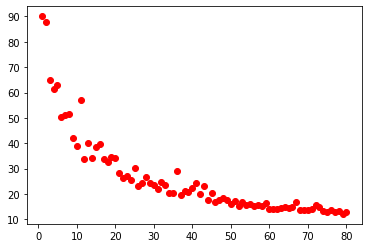

<Figure size 1080x72 with 0 Axes>

In [33]:
""" CREATION OF TEST RANGE LR PLOT """
print(os.getcwd())
plt.scatter(epochCounter, valid_loss_vals, c="red")
#plt.xlim(0,0.05)
# plt.ylim(0,100)
plt.figure(figsize=(15,1))


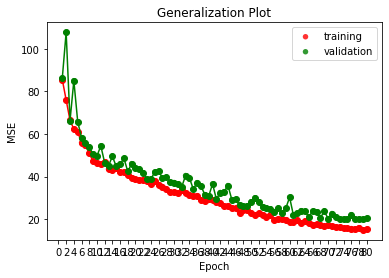

In [52]:
""" CREATION OF GENERALIZATION PLOT """
# genPlotFig =plt.figure()
# genPlotFig.add_axes([0,0,1,1])
# ax.scatter(epochCounter, train_loss_vals, color='r')
# ax.scatter(epochCounter, valid_loss_vals, color='b')

# ax.set_title('Genralization Plot')
fig=plt.figure(figsize=(10.0, 5.0))
colors = ("red", "green")
groups = ("training", "validation")
data = ((epochCounter, train_loss_vals), (epochCounter, valid_loss_vals))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    plt.plot(x,y,'-o',c=color)
ax.set_xlabel('Epoch')
ax.set_ylabel('MSE')
y = np.array([2,4,6,8,10,12,14,16,18])
plt.xticks(np.arange(0, n_epochs+2, step=2))

plt.title("Generalization Plot for " + month)
plt.legend()
plt.show()
os.chdir(startingDir)
my_dpi=96
fig.savefig("generalizationPlot"+month,dpi=my_dpi*5)

In [35]:
torch.set_printoptions(precision=4, sci_mode=False)

In [53]:
""" TESTING OF MODEL """

# Print out values and images that have large differences in target/value

# Track test loss
test_loss = 0.0
num_predictions = len(test_indices)

# Puts model will notify all your layers that you are in eval mode, that way, 
# batchnorm or dropout layers will work in eval mode instead of training mode.
model.eval()
tarList = list()
outList = list()
start = time.time()
counter = 0
# Iterate over test data
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.float(), target.float()
        # Move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        output = torch.flatten(output)
        # Calculate the batch loss
        loss = criterion(output, target)
        # Update test loss 
        test_loss += loss.item()
        
        for tar, out in zip(target, output):
            tarList.append(tar.item())
            outList.append(out.item())
        
        if counter < 10:
            print("test loss from", counter, ":", loss.item())
            print("Output of network:\t", output)
            print("Target Values:\t\t", target,"\n")
        
        # Example data tensors
        if counter < 2:
            print("loss from this run:", loss.item())
            #print("Output of network:\t", output)
            counterTHIS = 0
            for value in output:
                counterTHIS += 1
                if value.item() > 2.0:
                    print("Output", counterTHIS, ":", value.item())
            counterTHIS = 0
            for value in target:
                counterTHIS += 1
                if value.item() > 2.0:
                    print("Target", counterTHIS, ":", value.item())
            #print("Target Values:\t", target,"\n")
            counter += 1
            # CHECK LOss HEEWRE
        


    test_loss = test_loss/len(test_loader.sampler)
    print('Test Loss (mean squared error): {:.6f}\n'.format(test_loss))
print(f'Time: {time.time()-start}')

test loss from 0 : 1.6003055572509766
Output of network:	 tensor([16.9033, 26.7295,  0.5900,  0.5900,  0.5900,  0.5900], device='cuda:0')
Target Values:		 tensor([15.4137, 24.2820,  0.0000,  0.0000,  0.0000,  0.0000], device='cuda:0') 

loss from this run: 1.6003055572509766
Output 1 : 16.903270721435547
Output 2 : 26.72953224182129
Target 1 : 15.413675308227539
Target 2 : 24.281963348388672
test loss from 1 : 13.916994094848633
Output of network:	 tensor([ 6.6100, 33.1317,  0.5900,  0.9931, 28.5318,  1.2045], device='cuda:0')
Target Values:		 tensor([ 8.6672, 34.5709,  0.0000,  0.0000, 19.8696,  0.2936], device='cuda:0') 

loss from this run: 13.916994094848633
Output 1 : 6.610044479370117
Output 2 : 33.1317138671875
Output 5 : 28.531841278076172
Target 1 : 8.667219161987305
Target 2 : 34.57094192504883
Target 5 : 19.86959457397461
test loss from 2 : 31.344465255737305
Output of network:	 tensor([24.0896, 32.1312,  3.0652, 16.3050,  0.5900,  1.8234], device='cuda:0')
Target Values:		 

Output of network:	 tensor([ 0.5900,  1.7358, 20.1161,  0.5900, 36.4821, 11.8337], device='cuda:0')
Target Values:		 tensor([ 0.0000,  7.2560, 23.2214,  0.0000, 35.4535, 18.0271], device='cuda:0') 

test loss from 2 : 4.278385639190674
Output of network:	 tensor([ 1.0966,  3.1957, 17.8611,  0.5900, 10.2861,  2.3383], device='cuda:0')
Target Values:		 tensor([ 0.0000,  0.0000, 15.3368,  0.0000,  8.8482,  0.0000], device='cuda:0') 

test loss from 2 : 11.08878231048584
Output of network:	 tensor([ 0.7531,  0.7239, 20.2976,  1.1615,  0.5900, 26.3015], device='cuda:0')
Target Values:		 tensor([ 0.0000,  0.0000, 13.0072,  0.0000,  0.0000, 23.0467], device='cuda:0') 

test loss from 2 : 1.032107949256897
Output of network:	 tensor([ 0.5900,  1.7833, 21.7802,  0.5900,  2.1651,  0.5900], device='cuda:0')
Target Values:		 tensor([ 0.0000,  2.2904, 22.2313,  0.0000,  0.0000,  0.0000], device='cuda:0') 

test loss from 2 : 1.0260910987854004
Output of network:	 tensor([1.2407, 1.1311, 5.3330, 0.5

In [54]:
print("Targets:",tarList)
print("Outputs",outList)
os.chdir(startingDir)
titlesTestData = ["targets","outputs"]
testFileStats = "test_data_" + month +".csv"
print(trainFileStats)
with open(testFileStats,'w',newline='') as file:
    writer = csv.writer(file)
    writer.writerow(titlesTrainingData)
    for target, output in zip(tarList, outList):
        writer.writerow([target,output])

Targets: [15.413675308227539, 24.281963348388672, 0.0, 0.0, 0.0, 0.0, 8.667219161987305, 34.57094192504883, 0.0, 0.0, 19.86959457397461, 0.29355934262275696, 27.76616859436035, 42.48615646362305, 2.0097649097442627, 21.378076553344727, 0.0, 8.158004760742188, 1.9989063739776611, 0.0, 0.0, 0.0, 0.0, 0.0, 34.53057098388672, 0.0, 20.81892967224121, 0.0, 8.6765718460083, 0.0, 32.836551666259766, 31.971040725708008, 0.0, 0.0, 0.0, 0.0, 13.380698204040527, 23.09082794189453, 0.0, 0.0, 7.336853504180908, 30.551677703857422, 0.0, 0.0, 0.0, 23.824119567871094, 0.0, 34.6572151184082, 24.6774845123291, 0.0, 2.452630043029785, 5.6244940757751465, 33.50474166870117, 0.0, 0.0, 0.0, 0.0, 8.765008926391602, 7.864948272705078, 0.0, 0.0, 27.3992862701416, 0.0, 0.0, 12.22276496887207, 0.0, 6.766513824462891, 0.0, 0.0, 22.2650203704834, 0.0, 6.583832263946533, 6.77579402923584, 0.0, 9.797807693481445, 28.531536102294922, 25.13006591796875, 27.902179718017578, 28.630016326904297, 11.995145797729492, 8.4718

In [62]:
# """ TESTING OF IMPORTED MODEL """
# os.chdir(csvfilesMLLocation)

# # Print out values and images that have large differences in target/value
# #importModelPath = r"C:/Users/Peter/Desktop/Thermo_R_Code/FinalThermo/new2/csvdata9000/model_BCI.pt"
# #importModelPath = r"C:/Users/Peter/Desktop/Thermo_R_Code/FinalThermo/new/BCI-ML/Good_Models/model_BCItrainbigf.pt"
# importModelPath = r"C:/Users/Peter/Desktop/Thermo_R_Code/FinalThermo/new2/csvdataFULL/BCIML_Dataset/model_BCI.pt"
# # Track test loss
# test_loss = 0.0
# num_predictions = len(test_indices)

# # Import model
# model2 = BCIModel()
# model2.cuda()
# model2.load_state_dict(torch.load(importModelPath))

# # check if CUDA is available
# train_on_gpu = torch.cuda.is_available()

# if not train_on_gpu:
#     print('CUDA is not available.  Training on CPU ...')
# else:
#     print('CUDA is available!  Training on GPU ...')
#     model2.cuda()

# # Puts model will notify all your layers that you are in eval mode, that way, 
# # batchnorm or dropout layers will work in eval mode instead of training mode.
# model2.eval()

# max_loss = -10.0
# targetList = [-10.0,-10.0,-10.0]
# outputList = [-10.0,-10.0,-10.0]

# thresh_max = 13
# max_count = 0
# not_included_count = 0

# start = time.time()
# counter = 0
# predictions_divide_three = 0
# test_loss_real = 0
# # Iterate over test data
# with torch.no_grad():
#     for data, target in test_loader:
#         predictions_divide_three += 1
#         data, target = data.float(), target.float()
#         # Move tensors to GPU if CUDA is available
#         if train_on_gpu:
#             data, target = data.cuda(), target.cuda()
#         # Forward pass: compute predicted outputs by passing inputs to the model
#         output = model2(data)
#         output = torch.flatten(output)
#         # Calculate the batch loss
#         loss = criterion(output, target)
        
#         if(loss.item() > thresh_max):
#             max_count += 1
        
#         if(loss.item() > max_loss):
#             max_loss = loss.item()
# #             for num in range(batch_size):
# #                 targetList[num] = target[num].item()
# #                 outputList[num] = output[num].item()
        
        
#         test_loss_real += loss.item()
#         # Update test loss
#         if(loss.item() < thresh_max):
#             test_loss += loss.item()
#         else:
#             not_included_count += 1
        
#         #print(type(target[0].item()))
        
#         #raise Exception("DO NOT TRAIN, EVALUATION ONLY")
        
#         # Example data tensors
#         if counter < 10:
#             print("test loss from", counter, ":", loss.item())
#             print("Output of network:\t", output)
#             print("Target Values:\t\t", target,"\n")
#             counter += 1
        
#     test_loss = test_loss/((predictions_divide_three-not_included_count)*3)
#     test_loss_real = test_loss_real/(predictions_divide_three*3)
#     print('Test Loss (mean squared error): {:.6f}\n'.format(test_loss))
#     print('Test Loss Real (mean squared error): {:.6f}\n'.format(test_loss_real))
# print(f'Time: {time.time()-start}')

# print("Max loss:", max_loss)
# print("targets:", targetList)
# print("output:", outputList)
# print("max_count:", max_count)



#look at difference between with and without bigerros

CUDA is available!  Training on GPU ...
test loss from 0 : 8.705543518066406
Output of network:	 tensor([12.8590, 15.7529, -0.3846, 12.2453,  9.3890,  4.3938,  2.5041, 24.0620,
        28.4192,  1.5286, 12.6894, 26.6492, 22.8743,  0.9076,  1.4365, -0.0561,
         1.4544,  1.8497, 27.9742,  2.8806,  2.1493, 38.4997, 14.5286,  0.3495,
        25.0275, 28.5833,  0.9340,  1.0857, 12.7810,  0.6429, 21.6899,  0.4041,
        14.1196,  5.7087,  1.1327,  1.4717,  5.4660,  0.6382, 15.6079,  0.6562,
         0.2129, 19.7411, 14.8339, 10.6008,  0.9039,  0.7554, 26.4753,  0.6610,
         0.7440,  2.2295, -0.2550,  1.0393, 12.0048,  1.5124,  0.5966,  5.7378,
        20.1925,  9.6816, 24.3721, 12.1435], device='cuda:0')
Target Values:		 tensor([ 8.8612, 13.8704,  0.0000, 14.0826, 16.7069,  9.9999,  3.4293, 27.1545,
        30.5333,  0.0000, 15.6925, 29.5445, 17.7824,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000, 25.2060,  2.0798,  0.0000, 38.5423, 16.9126,  0.0000,
        16.4176, 29.5312